In [ ]:
! pip install langchain-google-genai langchain_core langgraph

In [24]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph,START,END,MessagesState
from langgraph.graph.state import CompiledStateGraph
from dotenv import load_dotenv
import os
from typing_extensions import TypedDict

#Loading Environment Variables
load_dotenv()

#Storing api key in a variable
api_key = os.getenv("GEMINI_API_KEY")

llm : ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash",api_key=api_key)

In [52]:
class State(TypedDict):
    graph_state:str

builder:StateGraph = StateGraph(State)


def node1(state):
    print("---- Node1 ----")
    return {"graph_state":state['graph_state'] +" I am"}

def node2(state):
    print("---- Node2 ----")
    return {"graph_state":state['graph_state']+ " happy !"}

def node3(state):
    print("---- Node3 ----")
    return {"graph_state":state['graph_state'] + " but I am not feeling good !"}


builder.add_node("node1",node1)
builder.add_node("node2",node2)
builder.add_node("node3",node3)

builder.add_edge(START,"node1")
builder.add_edge("node1","node2")
builder.add_edge("node2","node3")
builder.add_edge("node3",END)

graph : CompiledStateGraph = builder.compile()

In [54]:
graph.invoke({"graph_state":"Hi! This is Shahmir"})


---- Node1 ----
---- Node2 ----
---- Node3 ----


{'graph_state': 'Hi! This is Shahmir I am happy ! but I am not feeling good !'}

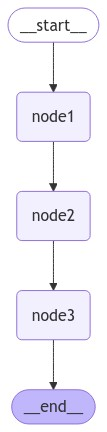

In [18]:
from IPython.display import display,Image

display(Image(graph.get_graph().draw_mermaid_png()))
